**Data Cleaning**

In [ ]:
import pandas as pd

In [ ]:
#importing fake news for 2016-2017
fake1 = pd.read_csv('/content/Fake 2016-2017.csv')
fake1.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
#importing fake news for 2018
fake2 = pd.read_csv('/content/Fake 2018.csv', delimiter=';')
fake2.head()

,text,label
0,dark agenda behind globalism open border altma...,0
1,america poor still get shaft sami jamil jadall...,0
2,number accuser grow former miss finland accuse...,0
3,heroic prego advertisement replaces refresh we...,0
4,russia syria debbie reynolds thursday even bri...,1


In [ ]:
fake2['year'] = 2018

In [ ]:
fake2.head()

,text,label,year
0,dark agenda behind globalism open border altma...,0,2018
1,america poor still get shaft sami jamil jadall...,0,2018
2,number accuser grow former miss finland accuse...,0,2018
3,heroic prego advertisement replaces refresh we...,0,2018
4,russia syria debbie reynolds thursday even bri...,1,2018


In [ ]:
# Robust conversion with mixed date formats
fake1['year'] = pd.to_datetime(fake1['date'], format='mixed', errors='coerce').dt.year

In [ ]:
# Convert the date column to datetime with mixed formats
fake1['date'] = pd.to_datetime(fake1['date'], format='mixed', errors='coerce')

# Now extract the year into a new column
fake1['year'] = fake1['date'].dt.year

In [ ]:
fake1.head()

,title,text,subject,date,year
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,2017.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,2017.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,2017.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,2017.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,2017.0


In [ ]:
fake1['year'].value_counts()

,count
year,
2016.0,11754
2017.0,9203
2015.0,2479
2018.0,35


In [ ]:
# Select only relevant columns
fake1 = fake1[['title', 'text', 'year']]

# 2018 file may not have a 'title' — just fill in with None or an empty string
fake2 = fake2[['text']].copy()
fake2['title'] = ''
fake2['year'] = 2018

# Reorder columns to match
fake2 = fake2[['title', 'text', 'year']]


In [ ]:
combined_fake = pd.concat([fake1, fake2], ignore_index=True)

In [ ]:
combined_fake.head()

,title,text,year
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,2017.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,2017.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",2017.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",2017.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,2017.0


In [ ]:
combined_fake['year'].value_counts()

,count
year,
2018.0,16681
2016.0,11754
2017.0,9203
2015.0,2479


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

def spacy_preprocess(text):
    doc = nlp(str(text).lower())
    tokens = [token.lemma_ for token in doc
              if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)

# Apply to your dataset
combined_fake['clean_text'] = combined_fake['text'].apply(spacy_preprocess)

In [ ]:
combined_fake.to_csv("combined_fake_news.csv", index=False)

In [ ]:
combined_fake = pd.read_csv('/content/combined_fake_news.csv')

**Word Frequency Analysis**

In [ ]:
from collections import Counter

def get_top_words(df, year, n=20):
    # Filter by year
    year_text = df[df['year'] == year]['clean_text'].str.cat(sep=' ')
    words = year_text.split()
    word_freq = Counter(words)
    return word_freq.most_common(n)


In [ ]:
print("Top words in 2015:")
print(get_top_words(combined_fake, 2015))

print("Top words in 2016:")
print(get_top_words(combined_fake, 2016))

print("\nTop words in 2017:")
print(get_top_words(combined_fake, 2017))

print("\nTop words in 2018:")
print(get_top_words(combined_fake, 2018))

Top words in 2015:
[('s', 12089), ('say', 5423), ('t', 3735), ('obama', 2856), ('year', 2499), ('state', 2442), ('people', 2378), ('president', 1947), ('tell', 1778), ('like', 1678), ('clinton', 1638), ('time', 1603), ('new', 1601), ('police', 1577), ('go', 1564), ('know', 1526), ('right', 1481), ('come', 1400), ('government', 1377), ('country', 1346)]
Top words in 2016:
[('s', 63677), ('trump', 35790), ('t', 21349), ('say', 20312), ('people', 13757), ('clinton', 12835), ('president', 10707), ('like', 9811), ('state', 9555), ('hillary', 9520), ('donald', 9356), ('obama', 9266), ('go', 9207), ('year', 8739), ('know', 8370), ('image', 8278), ('time', 8110), ('right', 7776), ('campaign', 7152), ('republican', 7062)]

Top words in 2017:
[('s', 53249), ('trump', 38700), ('say', 17358), ('t', 15501), ('president', 14549), ('people', 9903), ('donald', 7526), ('news', 7273), ('go', 7229), ('like', 7160), ('know', 6956), ('year', 6798), ('time', 6772), ('white', 6172), ('obama', 6100), ('tell',

In [ ]:
def top_words_df(df, year, n=20):
    top_words = get_top_words(df, year, n)
    return pd.DataFrame(top_words, columns=['word', 'frequency'])

top_words_2015 = top_words_df(combined_fake, 2015)
top_words_2016 = top_words_df(combined_fake, 2016)
top_words_2017 = top_words_df(combined_fake, 2017)
top_words_2018 = top_words_df(combined_fake, 2018)

In [ ]:
print("Top words in 2015:")
print(top_words_2015)

Top words in 2015:
          word  frequency
0            s      12089
1          say       5423
2            t       3735
3        obama       2856
4         year       2499
5        state       2442
6       people       2378
7    president       1947
8         tell       1778
9         like       1678
10     clinton       1638
11        time       1603
12         new       1601
13      police       1577
14          go       1564
15        know       1526
16       right       1481
17        come       1400
18  government       1377
19     country       1346


In [ ]:
print("Top words in 2016:")
print(top_words_2016)

Top words in 2016:
          word  frequency
0            s      63677
1        trump      35790
2            t      21349
3          say      20312
4       people      13757
5      clinton      12835
6    president      10707
7         like       9811
8        state       9555
9      hillary       9520
10      donald       9356
11       obama       9266
12          go       9207
13        year       8739
14        know       8370
15       image       8278
16        time       8110
17       right       7776
18    campaign       7152
19  republican       7062


In [ ]:
print("Top words in 2016:")
print(top_words_2016)

Top words in 2016:
          word  frequency
0            s      63677
1        trump      35790
2            t      21349
3          say      20312
4       people      13757
5      clinton      12835
6    president      10707
7         like       9811
8        state       9555
9      hillary       9520
10      donald       9356
11       obama       9266
12          go       9207
13        year       8739
14        know       8370
15       image       8278
16        time       8110
17       right       7776
18    campaign       7152
19  republican       7062


In [ ]:
print("Top words in 2017:")
print(top_words_2017)

Top words in 2017:
         word  frequency
0           s      53249
1       trump      38700
2         say      17358
3           t      15501
4   president      14549
5      people       9903
6      donald       7526
7        news       7273
8          go       7229
9        like       7160
10       know       6956
11       year       6798
12       time       6772
13      white       6172
14      obama       6100
15       tell       6074
16        new       6045
17      house       5958
18      state       5949
19      image       5574


In [ ]:
print("Top words in 2018:")
print(top_words_2018)

Top words in 2018:
          word  frequency
0           mr      55460
1        trump      49466
2        state      32200
3         time      30367
4          new      30320
5       people      30299
6         year      26416
7            u      26053
8      clinton      24275
9         like      22386
10   president      20932
11    american      17598
12        know      17213
13        come      16121
14        work      15968
15         use      15802
16         day      14867
17  government      14673
18     country      14465
19       think      14088


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(text_series, ngram_range=(2, 2), n=20):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(text_series)
    bag_of_words = vec.transform(text_series)
    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_ngrams = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return sorted_ngrams[:n]

In [ ]:
def get_top_ngrams(text_series, ngram_range=(2, 2), n=20):
    # Drop NaN values before fitting the vectorizer
    text_series = text_series.dropna()
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(text_series)
    bag_of_words = vec.transform(text_series)
    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_ngrams = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return sorted_ngrams[:n]

In [ ]:
bigrams_2015 = get_top_ngrams(combined_fake[combined_fake['year'] == 2015]['clean_text'], (2, 2))
bigrams_2016 = get_top_ngrams(combined_fake[combined_fake['year'] == 2016]['clean_text'], (2, 2))
bigrams_2017 = get_top_ngrams(combined_fake[combined_fake['year'] == 2017]['clean_text'], (2, 2))
bigrams_2018 = get_top_ngrams(combined_fake[combined_fake['year'] == 2018]['clean_text'], (2, 2))

In [ ]:
def display_ngrams(ngrams, year):
    df = pd.DataFrame(ngrams, columns=['ngram', 'frequency'])
    df['year'] = year
    return df

df_2015 = display_ngrams(bigrams_2015, 2015)
df_2016 = display_ngrams(bigrams_2016, 2016)
df_2017 = display_ngrams(bigrams_2017, 2017)
df_2018 = display_ngrams(bigrams_2018, 2018)

ngrams_all = pd.concat([df_2015, df_2016, df_2017, df_2018], ignore_index=True)

In [ ]:
ngrams_all.head(20)  # Show top 20 bigrams across years

,ngram,frequency,year
0,united states,686,2015
1,white house,531,2015
2,hillary clinton,461,2015
3,new york,458,2015
4,year old,429,2015
5,obama administration,345,2015
6,barack obama,331,2015
7,president obama,328,2015
8,state department,326,2015
9,breitbart news,324,2015


In [ ]:
print("Top Bigrams in 2015:")
print(df_2015)

print("Top Bigrams in 2016:")
print(df_2016)

print("\nTop Bigrams in 2017:")
print(df_2017)

print("\nTop Bigrams in 2018:")
print(df_2018)

Top Bigrams in 2015:
                   ngram  frequency  year
0          united states        686  2015
1            white house        531  2015
2        hillary clinton        461  2015
3               new york        458  2015
4               year old        429  2015
5   obama administration        345  2015
6           barack obama        331  2015
7        president obama        328  2015
8       state department        326  2015
9         breitbart news        324  2015
10        climate change        276  2015
11          donald trump        267  2015
12        police officer        264  2015
13       law enforcement        227  2015
14              fox news        217  2015
15         illegal alien        214  2015
16       plan parenthood        205  2015
17           human right        198  2015
18            black life        187  2015
19           life matter        186  2015
Top Bigrams in 2016:
               ngram  frequency  year
0       donald trump       8250  2016


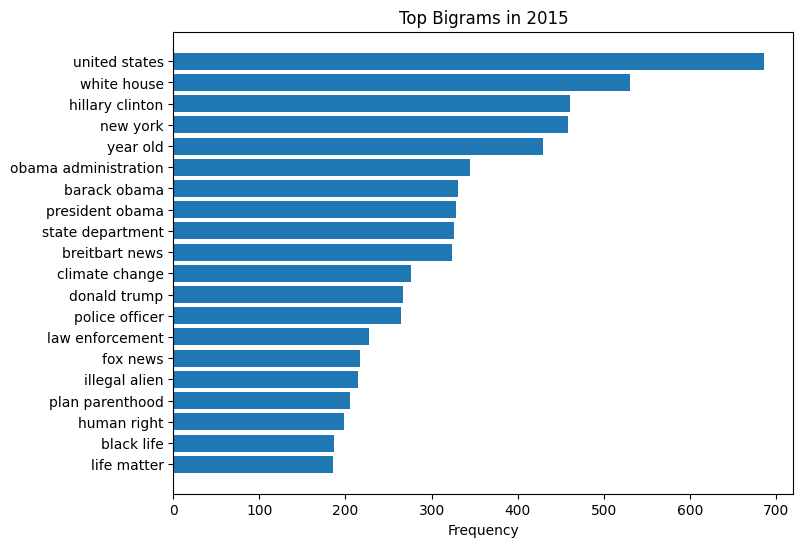

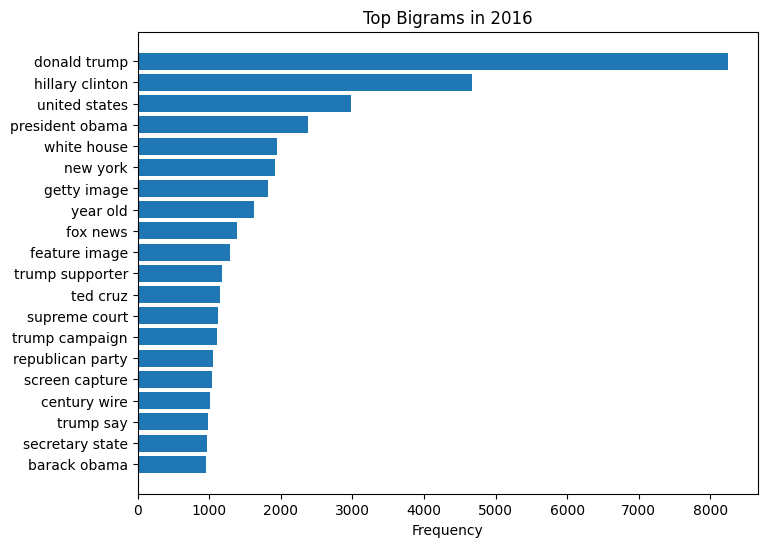

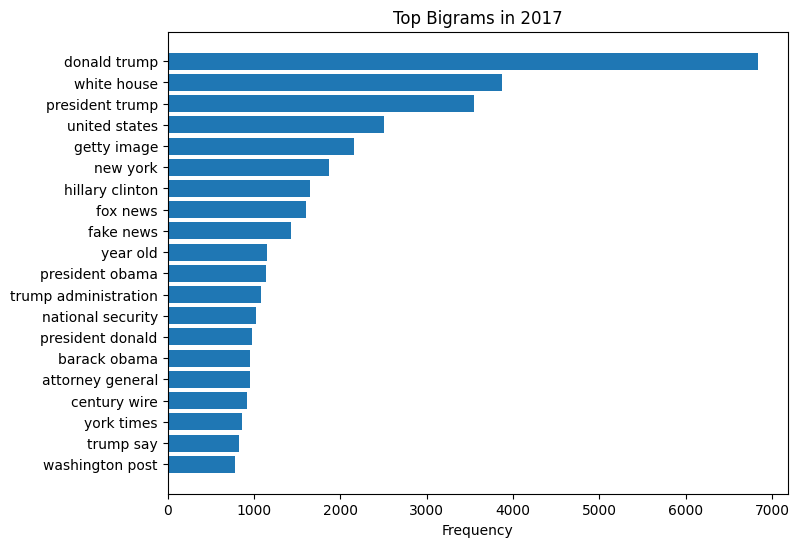

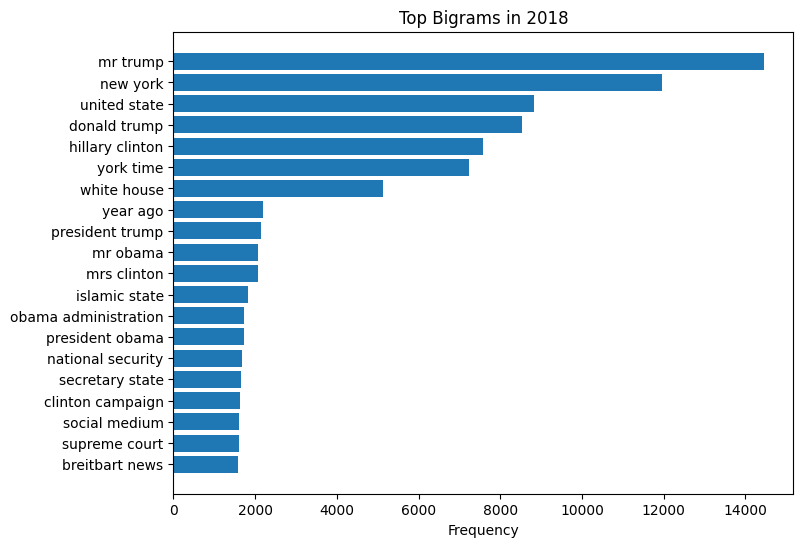

In [ ]:
import matplotlib.pyplot as plt

def plot_ngrams(df, year):
    top = df[df['year'] == year].sort_values(by='frequency', ascending=True)
    plt.figure(figsize=(8, 6))
    plt.barh(top['ngram'], top['frequency'])
    plt.title(f"Top Bigrams in {year}")
    plt.xlabel("Frequency")
    plt.show()


plot_ngrams(ngrams_all, 2015)
plot_ngrams(ngrams_all, 2016)
plot_ngrams(ngrams_all, 2017)
plot_ngrams(ngrams_all, 2018)

**Looking at real news**

In [ ]:
true1 = pd.read_csv("/content/True.csv")

In [ ]:
true1.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# Robust conversion with mixed date formats
true1['year'] = pd.to_datetime(true1['date'], format='mixed', errors='coerce').dt.year

In [ ]:
# Convert the date column to datetime with mixed formats
true1['date'] = pd.to_datetime(true1['date'], format='mixed', errors='coerce')

# Now extract the year into a new column
true1['year'] = true1['date'].dt.year

In [ ]:
true1.head()

,title,text,subject,date,year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,2017
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,2017
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,2017
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,2017
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,2017


In [ ]:
true1['year'].value_counts()

,count
year,
2017,16701
2016,4716
